## Import

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as selection_make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


###

## Explore Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Checking for duplicates

df.duplicated().sum()

0

In [6]:
# Checking for empty values

df.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset
0    6599
1     220
Name: Bankrupt?, dtype: int64


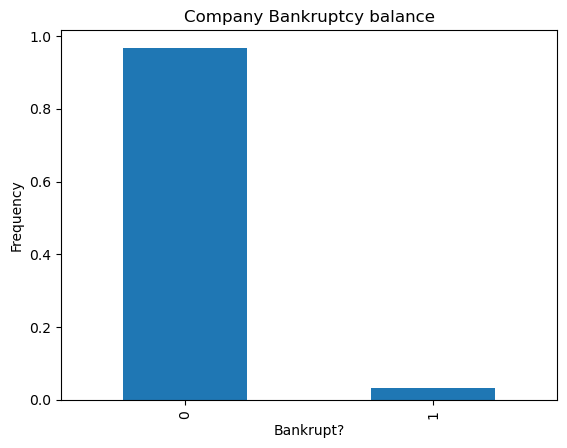

In [7]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind='bar')
plt.xlabel("Bankrupt?")
plt.ylabel("Frequency")
plt.title("Company Bankruptcy balance")

print("Financially stable: ", round(df['Bankrupt?'].value_counts()[0] / len(df) * 100, 2), "% of the dataset")
print("Financially unstable: ", round(df['Bankrupt?'].value_counts()[1] / len(df) * 100, 2), "% of the dataset")
print(df['Bankrupt?'].value_counts())

###

## Exploratory Data Analysis (EDA)

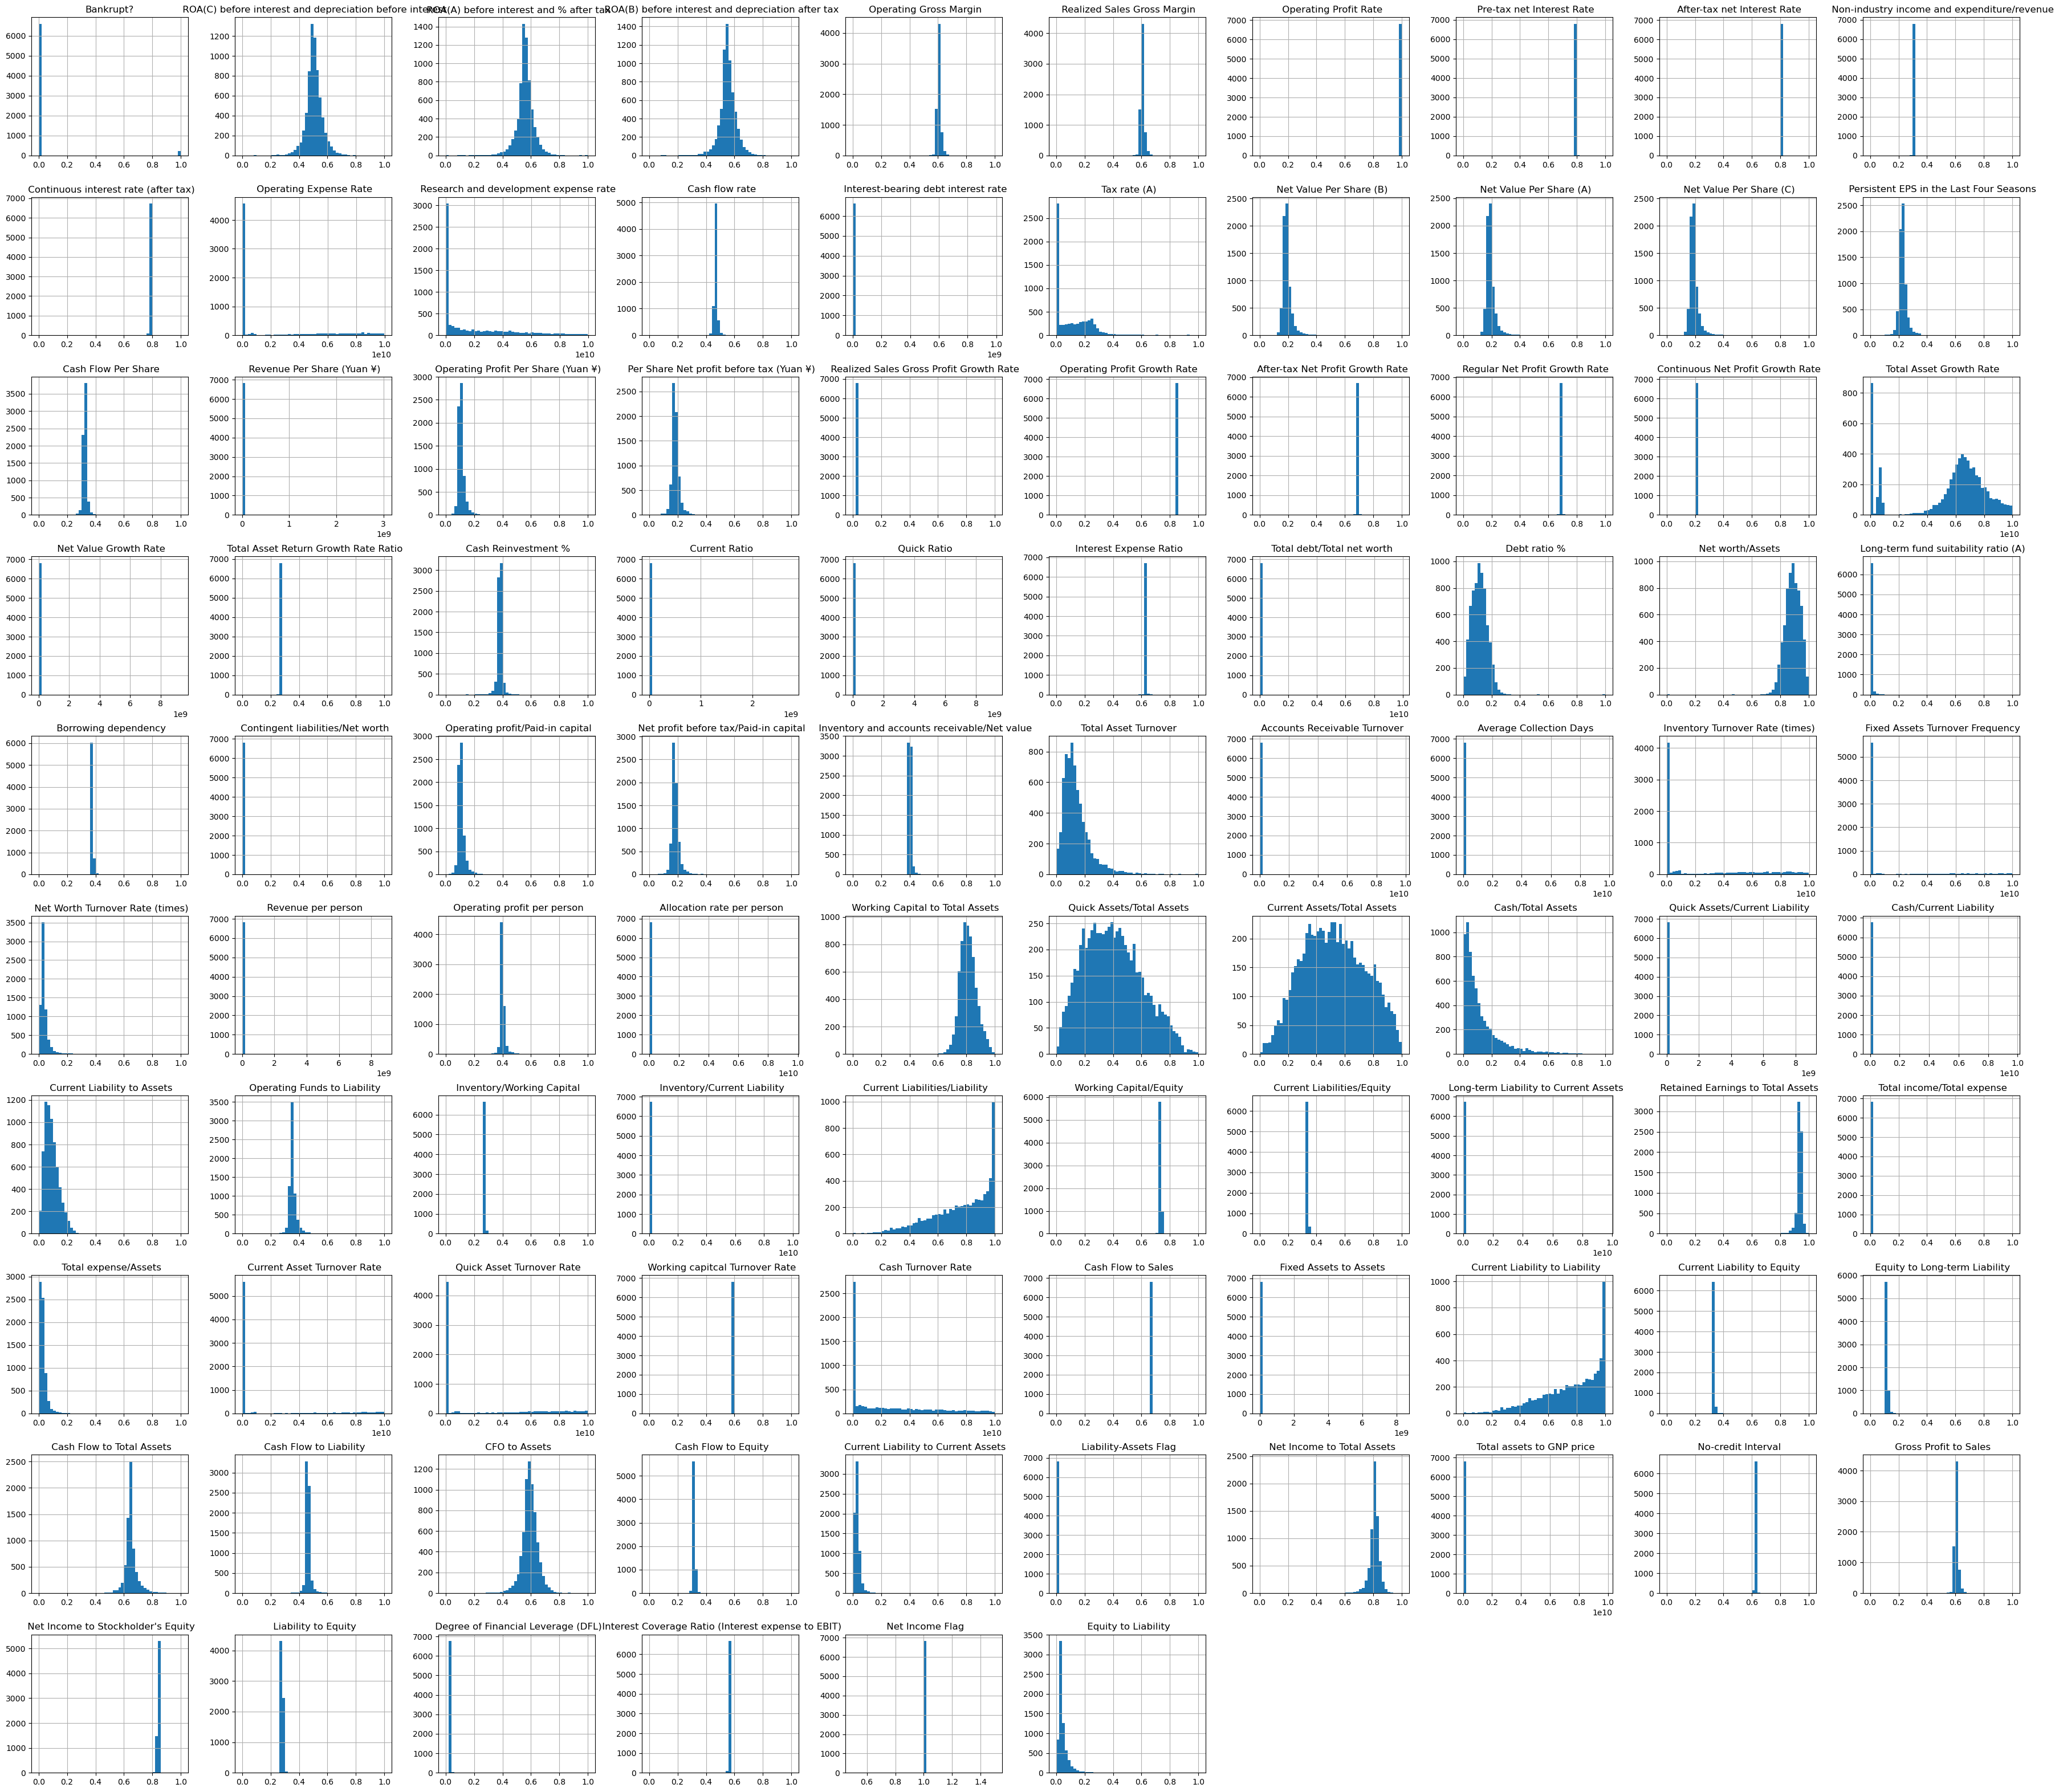

In [8]:
df.hist(figsize = (45,40), bins = 50)
plt.show()

<Axes: >

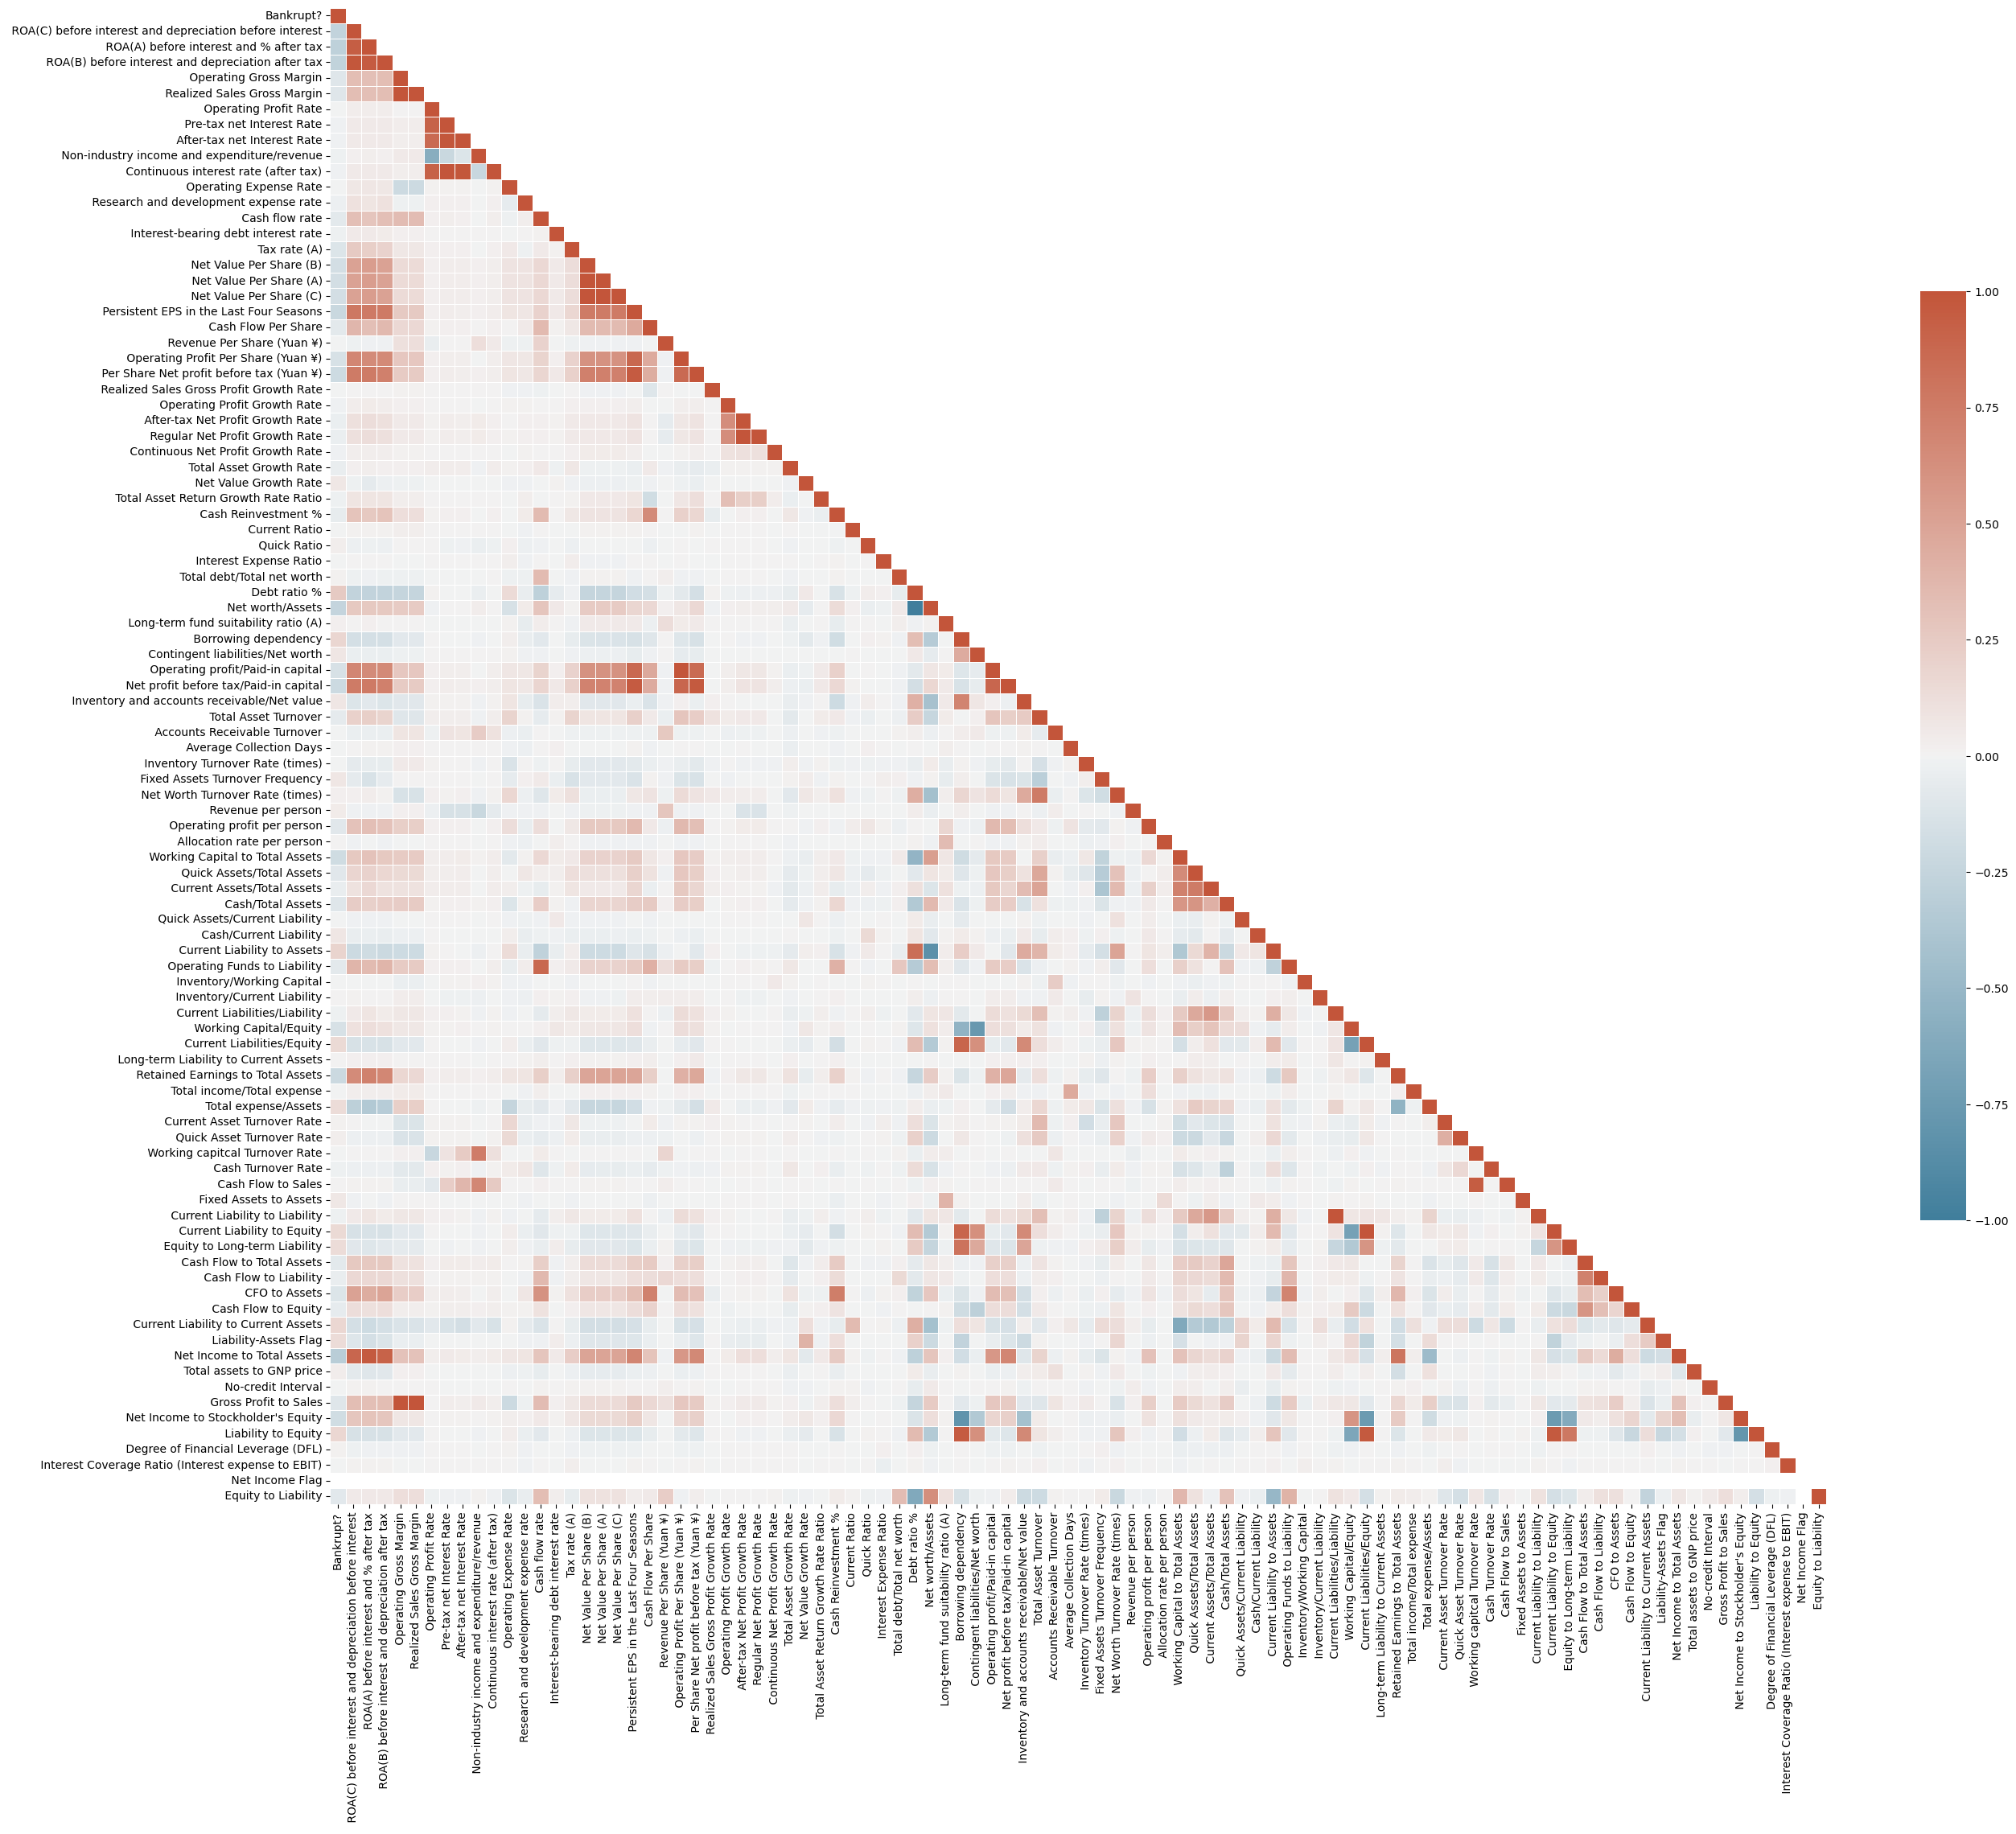

In [9]:
# Correlation Heatmap
plt.subplots(figsize=(30,30))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
cmap = sns.diverging_palette(230, 20, as_cmap= True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Bankrupt vs Debt ratio %')

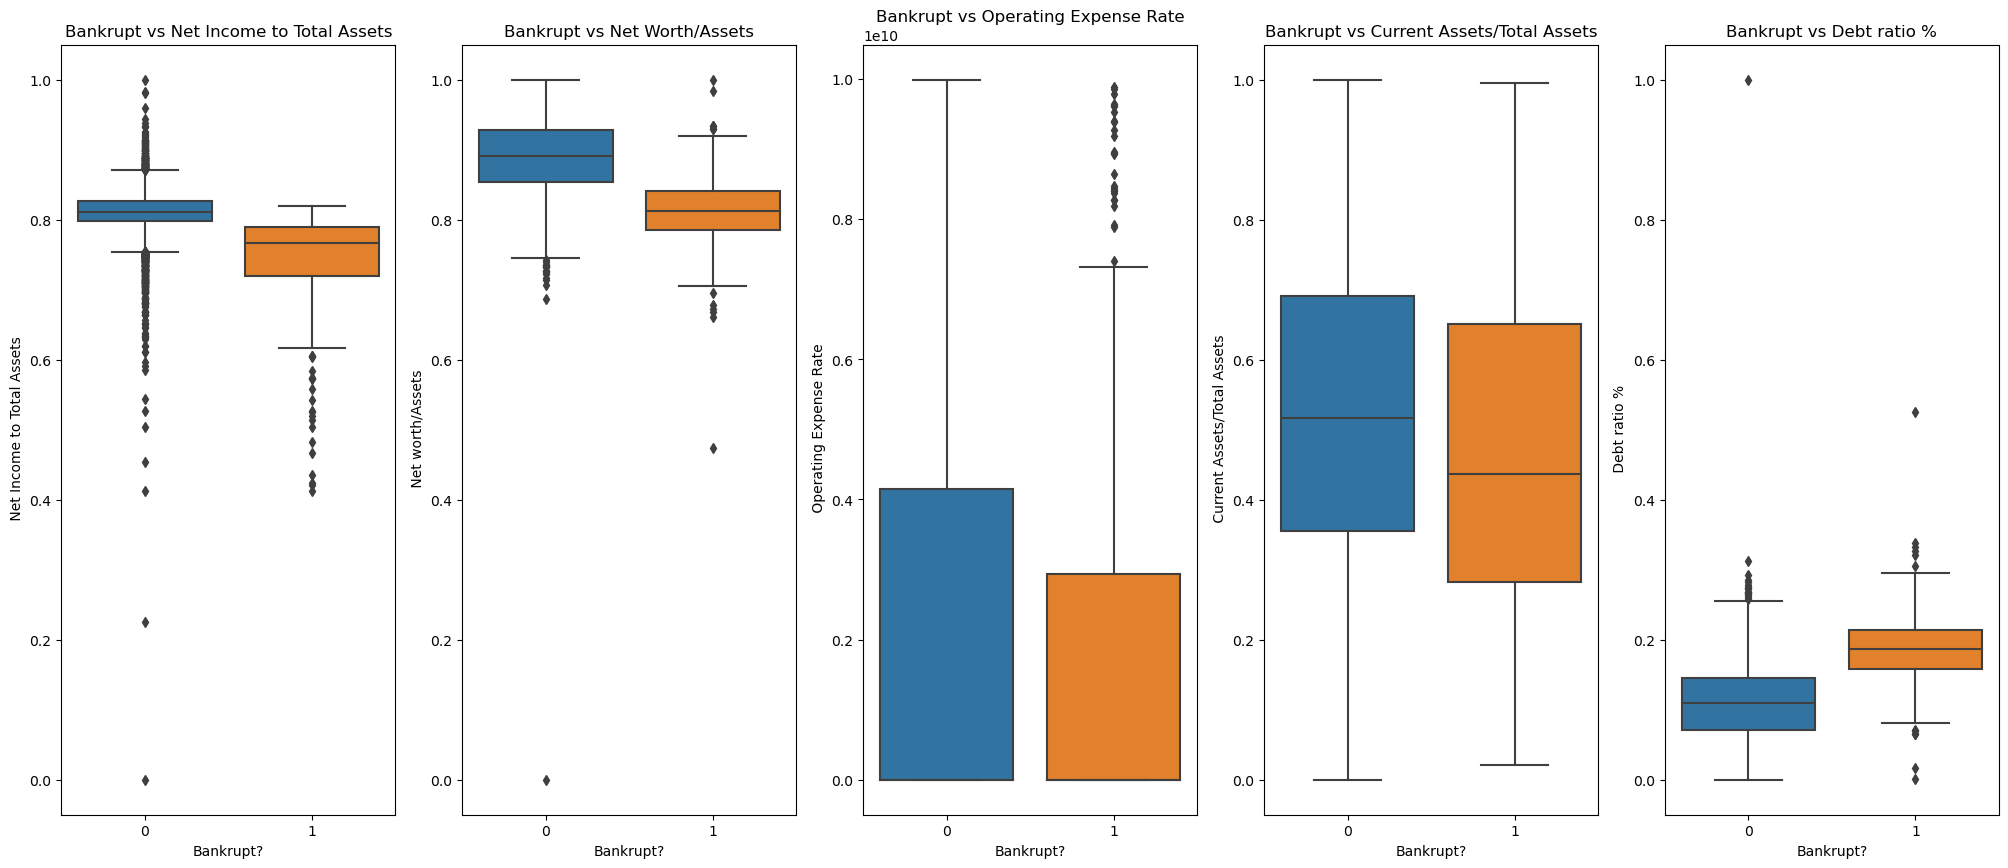

In [10]:
# Plotting some interesting features in comparison to Bankruptcy Flag

f, axes = plt.subplots(ncols=5, figsize=(25,10))

sns.boxplot(x='Bankrupt?', y=' Net Income to Total Assets', data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=' Net worth/Assets', data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs Net Worth/Assets')

sns.boxplot(x='Bankrupt?', y=' Operating Expense Rate', data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Operating Expense Rate')

sns.boxplot(x='Bankrupt?', y=' Current Assets/Total Assets', data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs Current Assets/Total Assets')

sns.boxplot(x='Bankrupt?', y=' Debt ratio %', data=df, ax=axes[4])
axes[4].set_title('Bankrupt vs Debt ratio %')

Text(0.5, 1.0, 'Bankrupt vs Cash Flow to Total Assets')

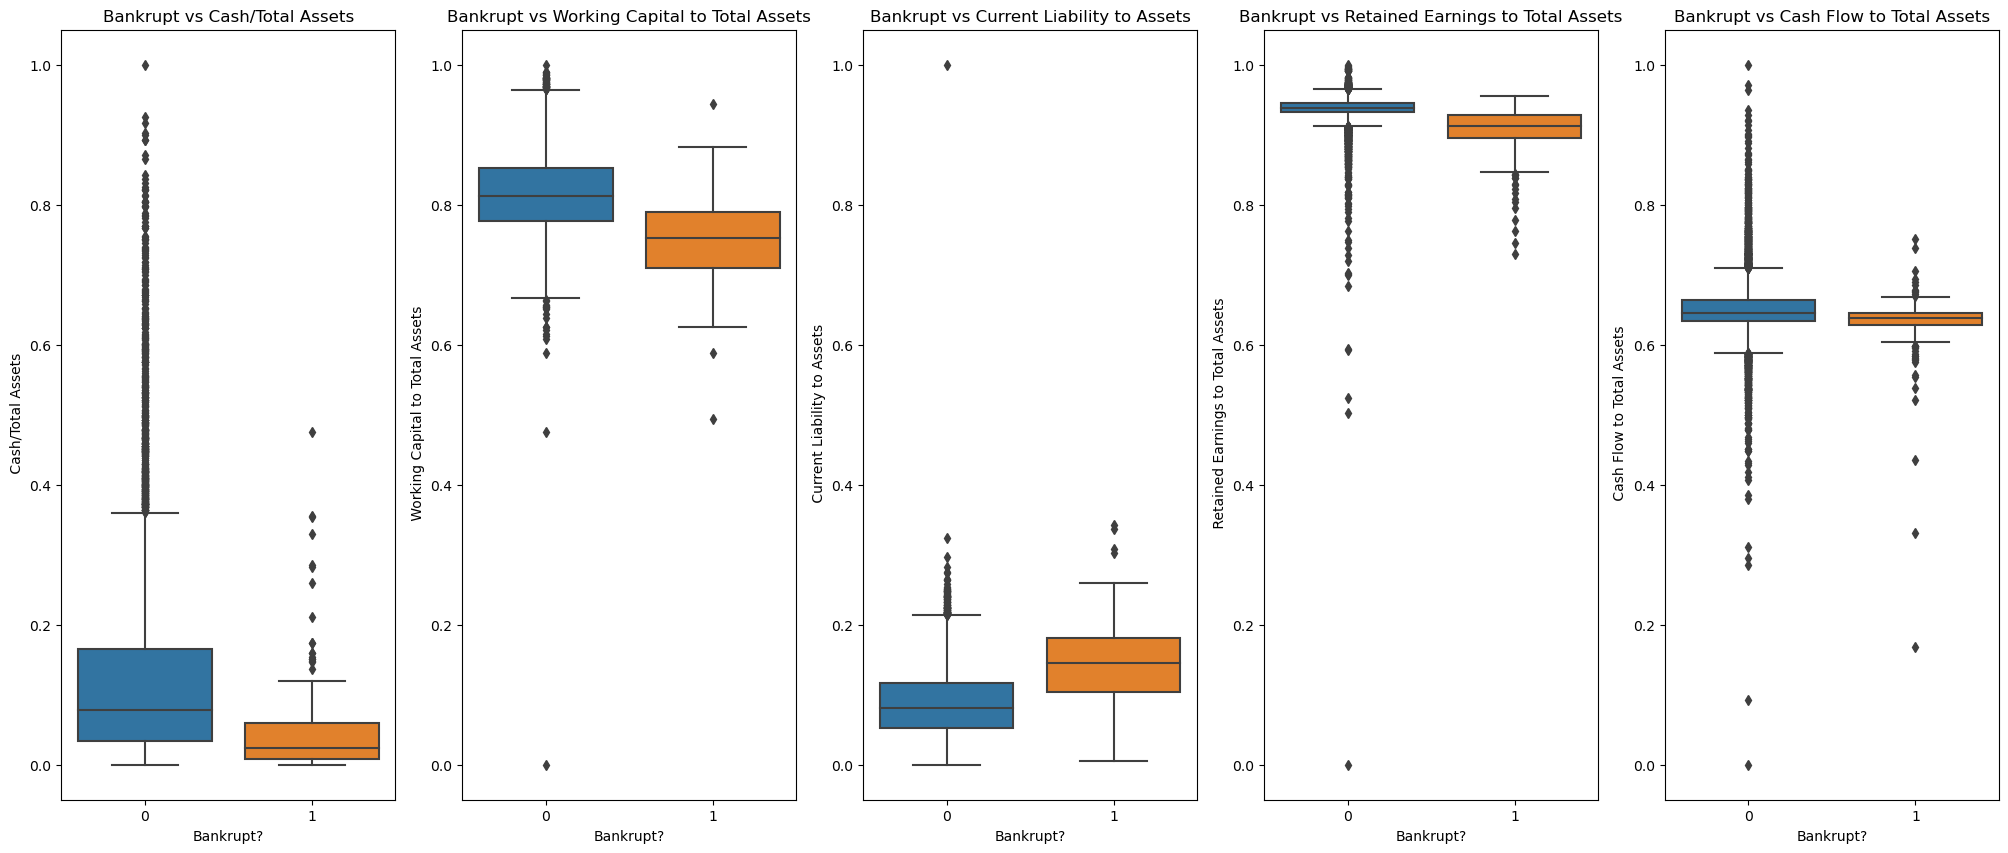

In [11]:
# Plotting some interesting features in comparison to Bankruptcy Flag

f, axes = plt.subplots(ncols=5, figsize=(25,10))

sns.boxplot(x='Bankrupt?', y=' Cash/Total Assets', data=df, ax=axes[0])
axes[0].set_title('Bankrupt vs Cash/Total Assets')

sns.boxplot(x='Bankrupt?', y=' Working Capital to Total Assets', data=df, ax=axes[1])
axes[1].set_title('Bankrupt vs Working Capital to Total Assets')

sns.boxplot(x='Bankrupt?', y=' Current Liability to Assets', data=df, ax=axes[2])
axes[2].set_title('Bankrupt vs Current Liability to Assets')

sns.boxplot(x='Bankrupt?', y=' Retained Earnings to Total Assets', data=df, ax=axes[3])
axes[3].set_title('Bankrupt vs Retained Earnings to Total Assets')

sns.boxplot(x='Bankrupt?', y=' Cash Flow to Total Assets', data=df, ax=axes[4])
axes[4].set_title('Bankrupt vs Cash Flow to Total Assets')

###

In [12]:
# Seperate features in numeric and categorical

numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


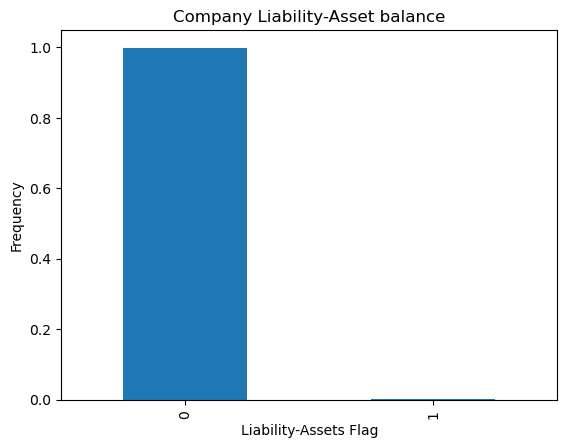

In [13]:
df[' Liability-Assets Flag'].value_counts(normalize= True).plot(kind='bar')
plt.xlabel('Liability-Assets Flag')
plt.ylabel('Frequency')
plt.title('Company Liability-Asset balance')

print(df[' Liability-Assets Flag'].value_counts())

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


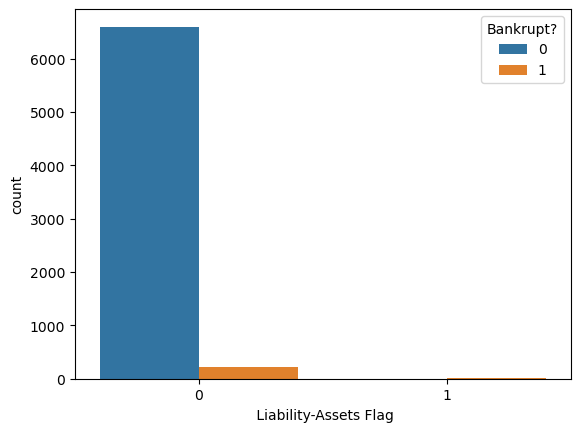

In [14]:
sns.countplot(x=' Liability-Assets Flag', hue='Bankrupt?', data=df)

print(df[[' Liability-Assets Flag', 'Bankrupt?']].value_counts())

1    6819
Name:  Net Income Flag, dtype: int64


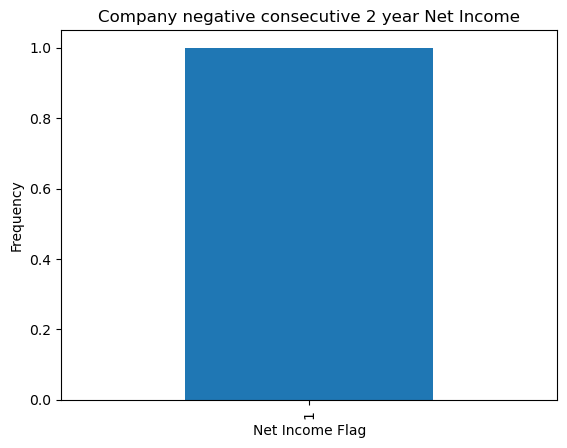

In [15]:
df[' Net Income Flag'].value_counts(normalize= True).plot(kind='bar')
plt.xlabel('Net Income Flag')
plt.ylabel('Frequency')
plt.title('Company negative consecutive 2 year Net Income')

print(df[' Net Income Flag'].value_counts())

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


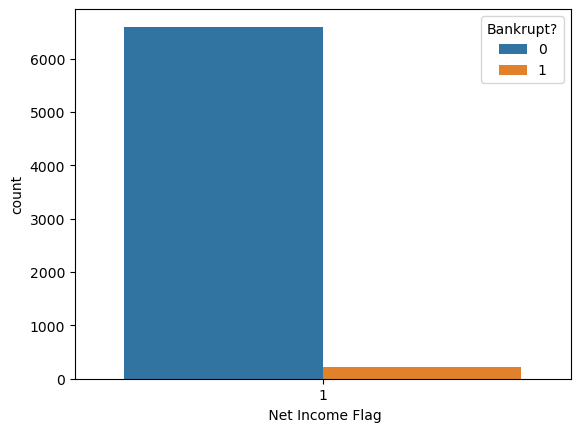

In [16]:
sns.countplot(x= ' Net Income Flag', hue= 'Bankrupt?', data=df)

print(df[[' Net Income Flag', 'Bankrupt?']].value_counts())

###

In [17]:
# Top 5 features with positive/negative correlation to Bankrupt

positive_corr = df[numeric_features].corrwith(df['Bankrupt?']).sort_values(ascending=False)[:6].index.tolist()
negative_corr = df[numeric_features].corrwith(df['Bankrupt?']).sort_values(ascending=True)[:6].index.tolist()

positive_corr = df[positive_corr + ['Bankrupt?']].copy()
negative_corr = df[negative_corr + ['Bankrupt?']].copy()

<Axes: >

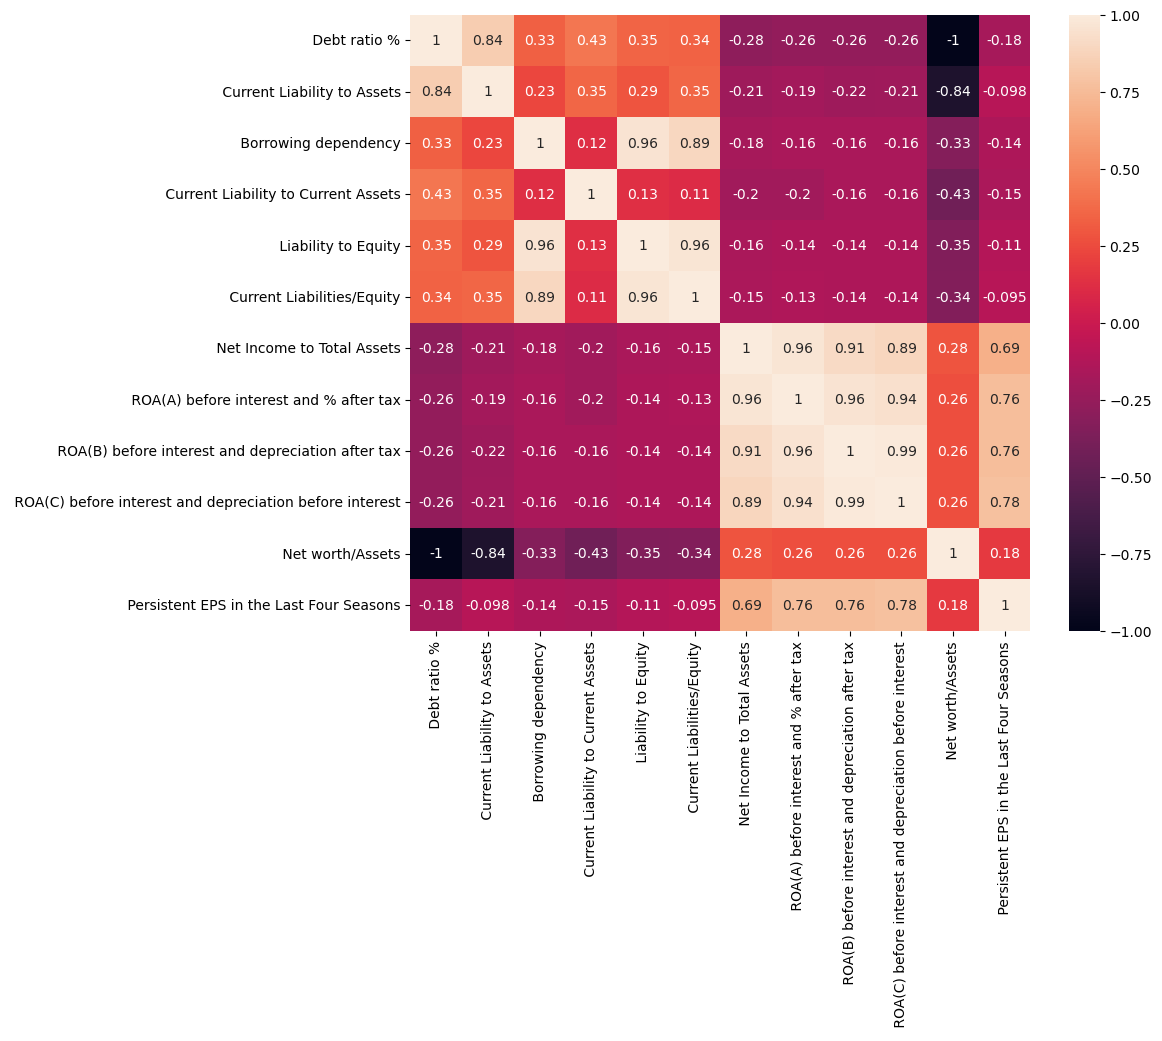

In [18]:
# Correlation among Positive and Negative features

plt.figure(figsize=(10,8))
corr = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
sns.heatmap(df[corr].corr(), annot=True)

In [19]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,10))
    
    for i in range(1,7):
        plt.subplot(2,3,i)
        sns.barplot(x= x_value, y= y_value[i-1], data= df)
    
    plt.tight_layout(pad= 1)

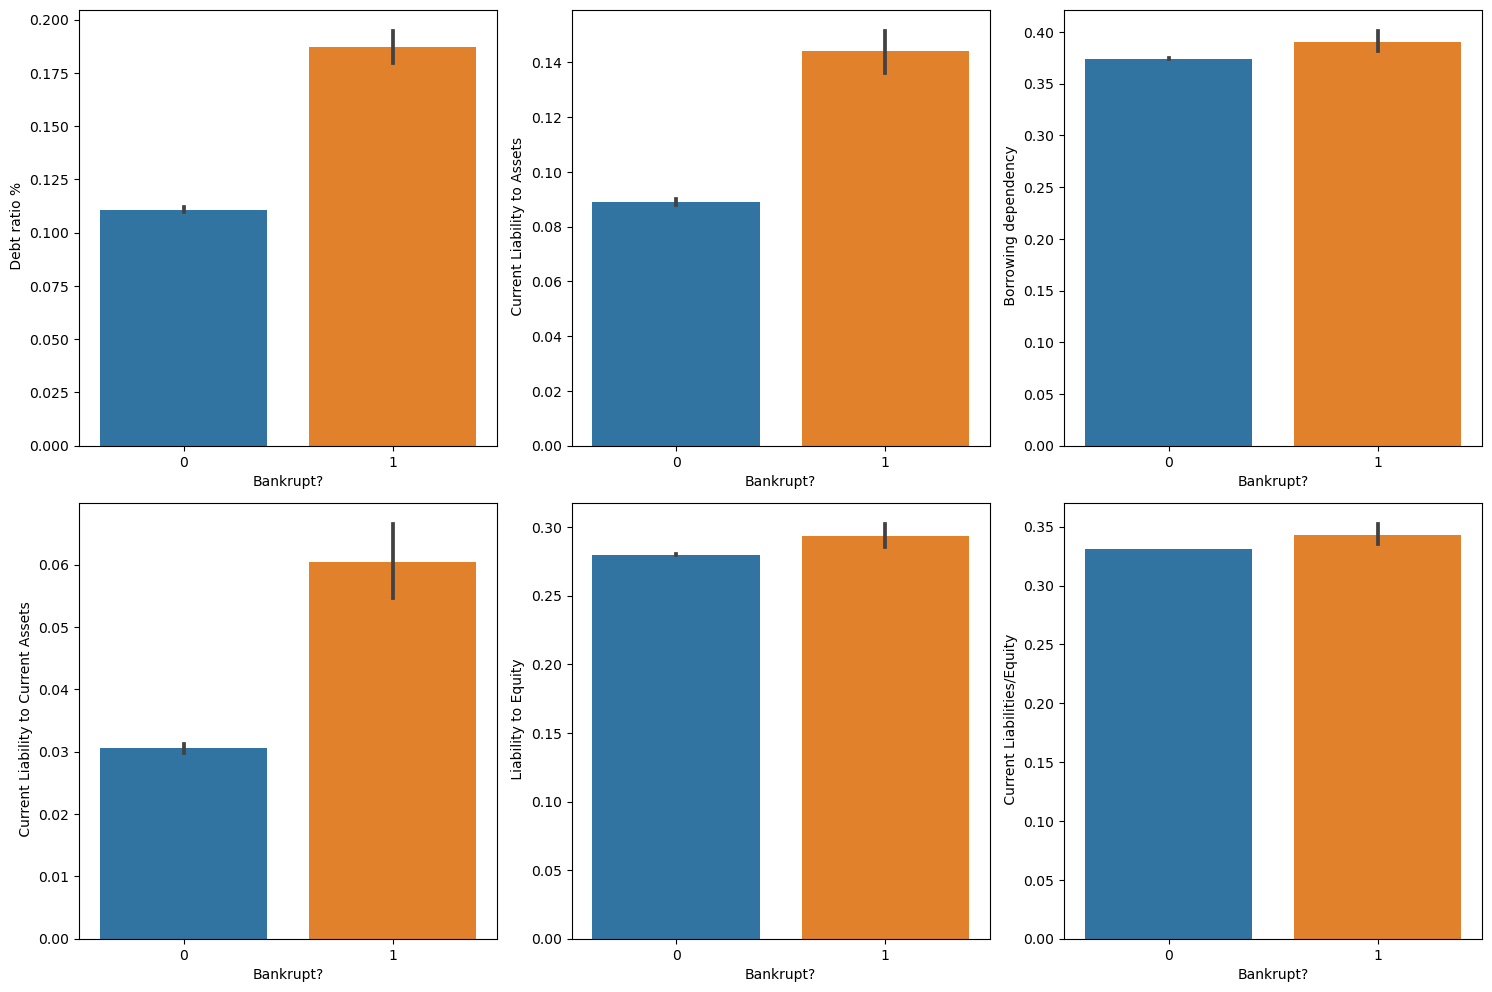

In [20]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

"Debt ratio %", "Current Liability to Assets" and "Current Liability to Current Assets" appear to have greater impact on companies that goes bankrupt

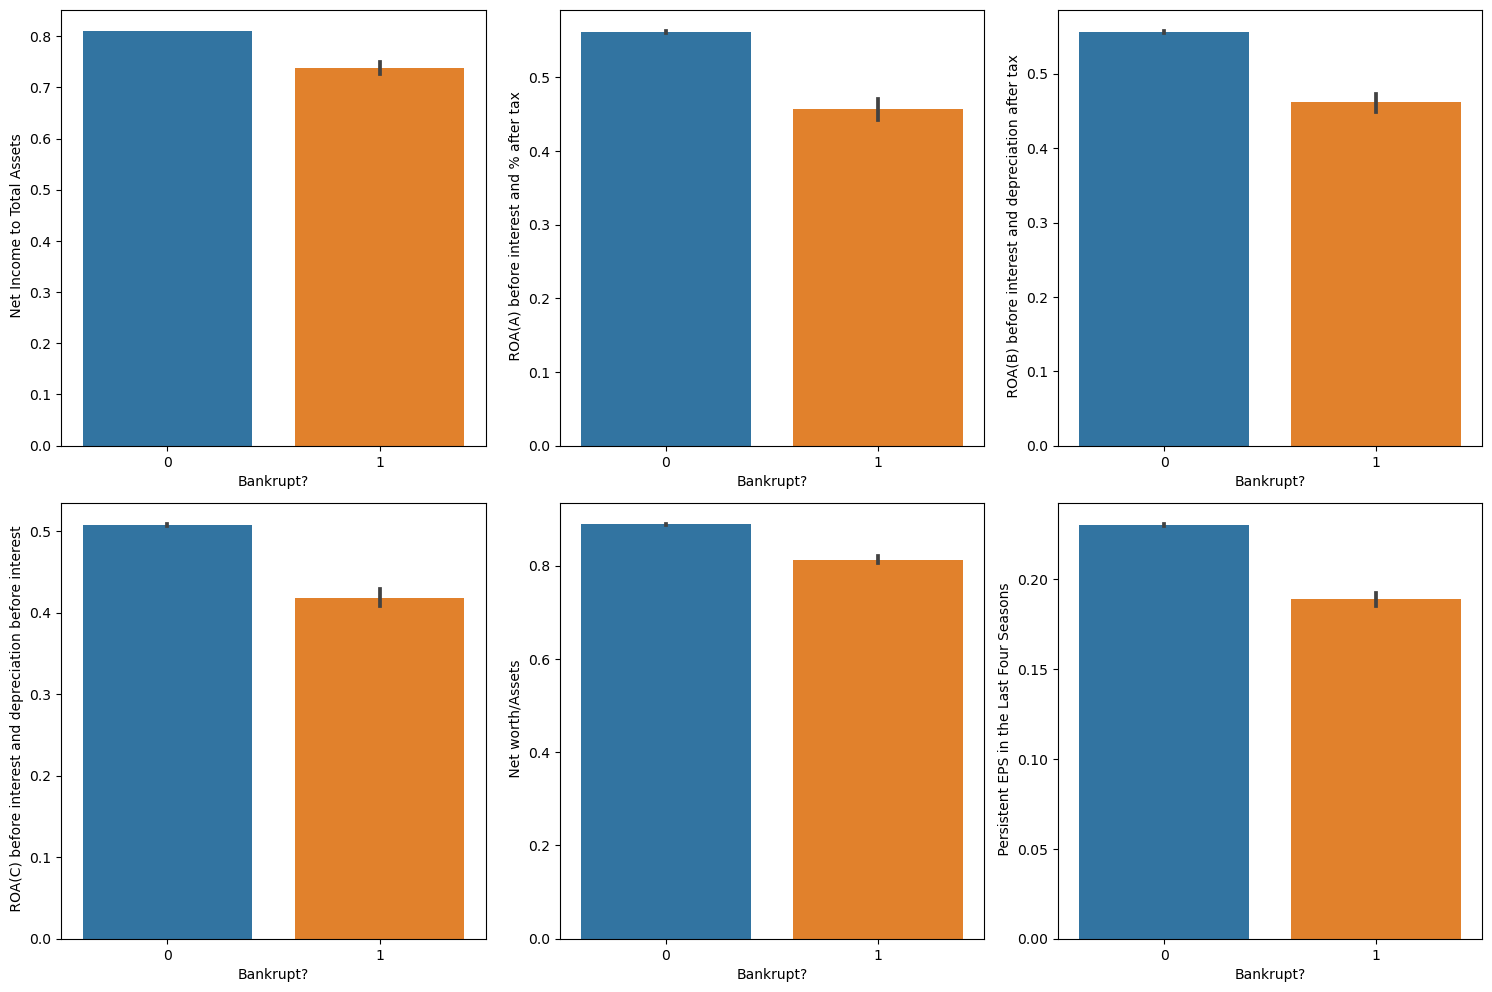

In [21]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

The Assets and a persistent EPS have a greater role in stable companies

<Axes: xlabel='Liability to Equity', ylabel='Current Liability to Equity'>

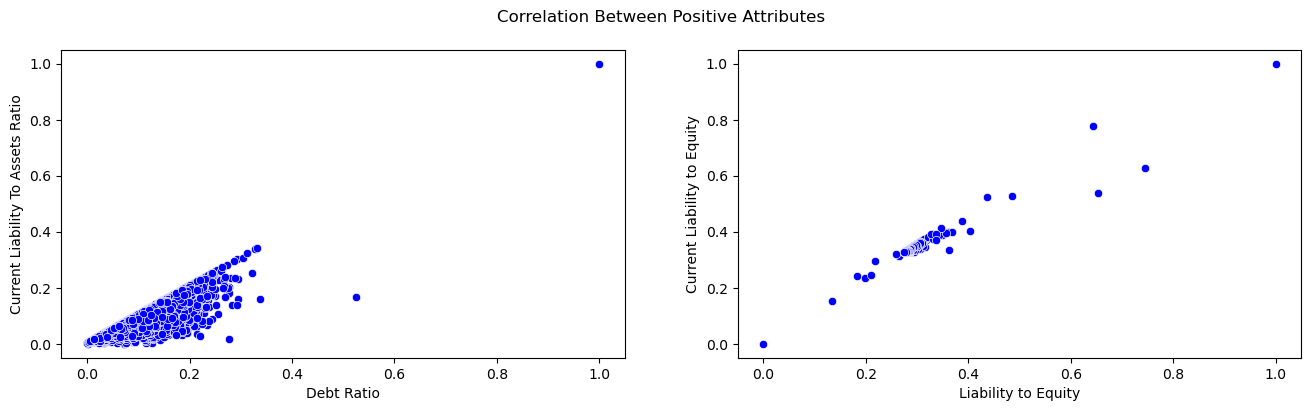

In [22]:
# Correlation between the Positive Attributes

plt.figure(figsize=(16,4))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
sns.scatterplot(x=df[' Debt ratio %'], y=df[' Current Liability to Assets'], color='blue')

plt.subplot(1,2,2)
plt.xlabel("Liability to Equity")
plt.ylabel("Current Liability to Equity")
sns.scatterplot(x=df[' Liability to Equity'], y=df[' Current Liability to Equity'], color='blue')

<Axes: xlabel='Borrowing Dependency', ylabel='Liability To Equity Ratio'>

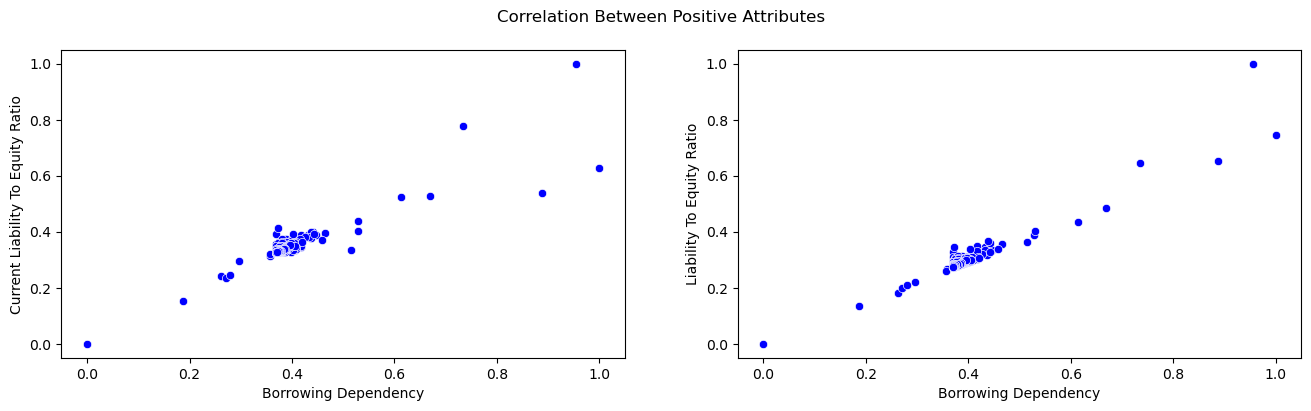

In [23]:
# Correlation between the Positive Attributes

plt.figure(figsize=(16,4))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Current Liability To Equity Ratio")
sns.scatterplot(x=df[' Borrowing dependency'], y=df[' Current Liability to Equity'], color='blue')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
sns.scatterplot(x=df[' Borrowing dependency'], y=df[' Liability to Equity'], color='blue')

<Axes: xlabel='ROA (B)', ylabel='ROA (C)'>

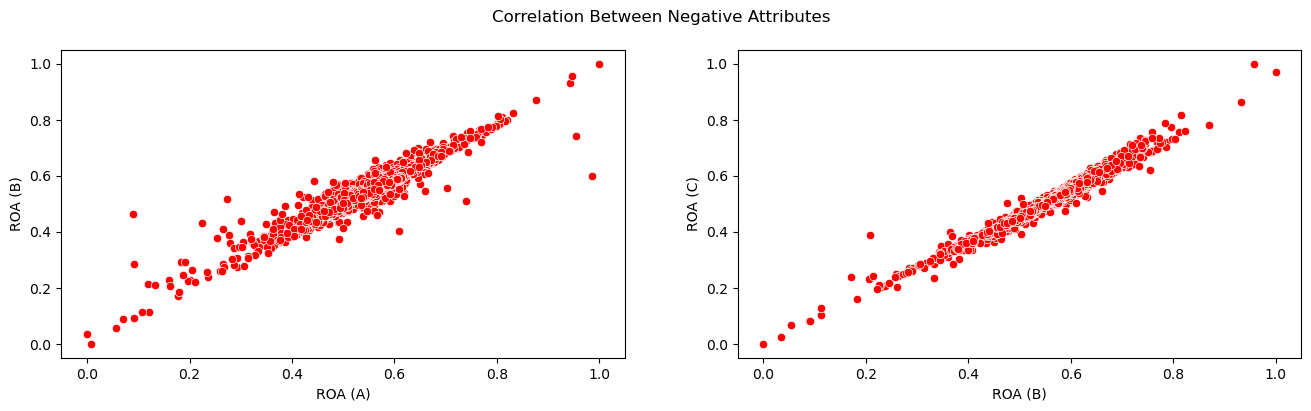

In [24]:
# Correlation between the Negative Attributes

plt.figure(figsize=(16,4))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(x=df[' ROA(A) before interest and % after tax'], y=df[' ROA(B) before interest and depreciation after tax'], 
                color='red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(x=df[' ROA(B) before interest and depreciation after tax'], y=df[' ROA(C) before interest and depreciation before interest'],
               color='red')

<Axes: xlabel='Persistent EPS in the Last Four Seasons', ylabel='ROA (C)'>

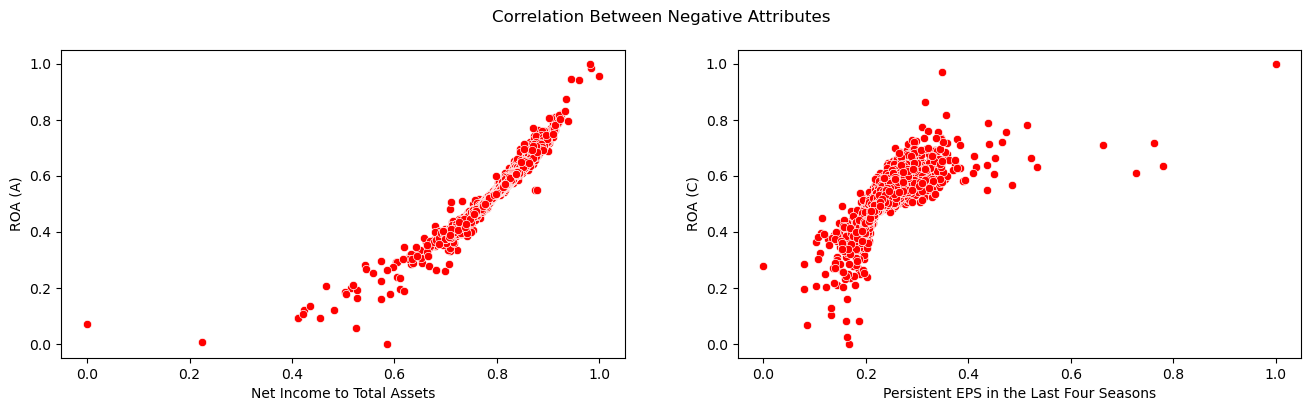

In [27]:
# Correlation between the Negative Attributes

plt.figure(figsize=(16,4))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("Net Income to Total Assets")
plt.ylabel("ROA (A)")
sns.scatterplot(x=df[' Net Income to Total Assets'], y=df[' ROA(A) before interest and % after tax'], 
                color='red')

plt.subplot(1,2,2)
plt.xlabel("Persistent EPS in the Last Four Seasons")
plt.ylabel("ROA (C)")
sns.scatterplot(x=df[' Persistent EPS in the Last Four Seasons'], y=df[' ROA(C) before interest and depreciation before interest'],
               color='red')

<Axes: xlabel='Net Worth to Assets Ratio', ylabel='Current Liability to Assets Ratio'>

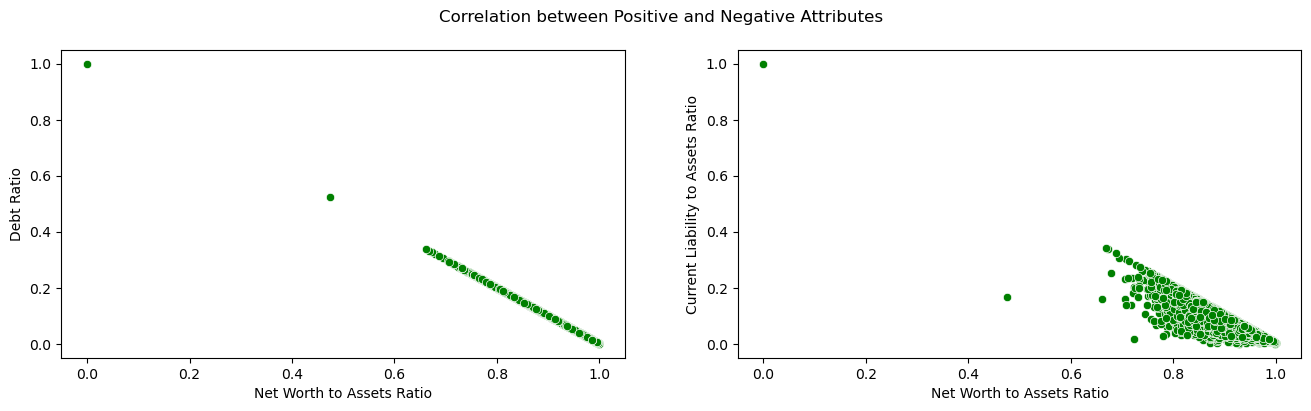

In [28]:
# Correlation between Positive and Negative Attributes

plt.figure(figsize=(16,4))

plt.suptitle("Correlation between Positive and Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("Net Worth to Assets Ratio")
plt.ylabel("Debt Ratio")
sns.scatterplot(x=df[' Net worth/Assets'], y=df[' Debt ratio %'], color='green')

plt.subplot(1,2,2)
plt.xlabel("Net Worth to Assets Ratio")
plt.ylabel("Current Liability to Assets Ratio")
sns.scatterplot(x=df[' Net worth/Assets'], y=df[' Current Liability to Assets'], color='green')

###

## Feature Engineering

As we saw, the dataset is highly unbalanced with 96.77% of the cases being as "Financially Stable"

We normalize the numeric attributes

In [29]:
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

df[numeric_features] = df[numeric_features].fillna(0)

To tackle this issue, we split the dataset into training and testing sets (80% - 20%). 
With Stratified K Fold Cross-Validation we are going to distribute the training set into further training and testing splits.

In [27]:
ModelsResults = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score'])

def model_training(Parameters, Model, DataFrame, ModelName):
    
    data = DataFrame.copy()
    
    X=data.drop(labels=['Bankrupt?'], axis=1)
    y=data['Bankrupt?']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    # Stratified Cross Validation Splitting
    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_sm, X_test_sm = X.iloc[train_index], X.iloc[test_index] 
        y_train_sm, y_test_sm = y.iloc[train_index], y.iloc[test_index]
    
    X_train_sm, X_test_sm = X_train_sm.values, X_test_sm.values
    y_train_sm, y_test_sm = y_train_sm.values, y_test_sm.values
    
    
    model_parameters = Parameters
    
    rand_model = RandomizedSearchCV(Model, model_parameters, n_iter=4)
    
    
     #Identify the best parameters through RandomizedSearchCV()
    for train, test in skf.split(X_train_sm, y_train_sm):
        pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), rand_model)
        fitting_model = pipeline.fit(X_train_sm[train], y_train_sm[train])
        best_model = rand_model.best_estimator_
        
        
    print()
    print("Model Evaluation")
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(X_train_sm, y_train_sm)
    
    final_model = rand_model.best_estimator_
    final_model.fit(Xsm_train, ysm_train)
    
    prediction = best_model.predict(X_test)
    
    print(classification_report(y_test, prediction))
    
    
    model_info = {}
    model_info['Algorithm'] = ModelName
    model_info['Accuracy'] = str(round((accuracy_score(y_test, prediction)*100), 2)) + "%"
    model_info['Precision'] = round(precision_score(y_test, prediction), 2)
    model_info['Recall'] = round(recall_score(y_test, prediction), 2)
    model_info['F1 Score'] = round(f1_score(y_test, prediction), 2)
    model_info['ROC-AUC Score'] = round(roc_auc_score(y_test,prediction), 2)
    
    return model_info

## Logistic Regression

In [28]:
print("Logistic Regression")

TrainedModel = model_training(
    {'penalty': ['l2'], 
     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
     'class_weight': ['balanced', None], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }, 
    LogisticRegression(), 
    df, 
    "Logistic Regression")

ModelsResults = ModelsResults.append(TrainedModel, ignore_index=True)

Logistic Regression

Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



## K Nearest Neighbour

In [29]:
print("K Nearest Neighbour")
TrainedModel = model_training(
    {'n_neighbors': list(range(2, 5 ,1)),
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    KNeighborsClassifier(),
    df,
    "K Nearest Neighbour")

ModelsResults = ModelsResults.append(TrainedModel, ignore_index=True)

K Nearest Neighbour

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.67      0.94      0.78        51

    accuracy                           0.98      1364
   macro avg       0.83      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



## Decision Tree

In [30]:
print("Decision Tree Classifier")
TrainedModel = model_training(
    {'criterion': ['gini', 'entropy'],
     'max_depth': list(range(2, 4, 1)),
     'min_samples_leaf': list(range(5, 7, 1))
    },
    DecisionTreeClassifier(),
    df,
    'Decision Tree Classifier')

ModelsResults = ModelsResults.append(TrainedModel, ignore_index=True)

Decision Tree Classifier

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1313
           1       0.20      0.94      0.32        51

    accuracy                           0.85      1364
   macro avg       0.60      0.90      0.62      1364
weighted avg       0.97      0.85      0.90      1364



## Random Forest

In [31]:
print("Random Forest Classifier")
TrainedModel = model_training(
    {'max_depth': [3, 5, 10, None],
     'n_estimators':[100, 200, 300, 400, 500]},
    RandomForestClassifier(),
    df,
    "Random Forest Classifier")

ModelsResults = ModelsResults.append(TrainedModel, ignore_index=True)

Random Forest Classifier

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1313
           1       0.26      0.90      0.41        51

    accuracy                           0.90      1364
   macro avg       0.63      0.90      0.68      1364
weighted avg       0.97      0.90      0.93      1364



## Support Vector

In [32]:
print("Support Vector Classifier")
TrainedModel = model_training(
    {'C':[1, 10, 20],
     'kernel': ['rbf', 'linear']},
    SVC(),
    df,
    "Support Vector Classifier")

ModelsResults = ModelsResults.append(TrainedModel, ignore_index=True)

Support Vector Classifier

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1313
           1       0.47      0.90      0.62        51

    accuracy                           0.96      1364
   macro avg       0.73      0.93      0.80      1364
weighted avg       0.98      0.96      0.96      1364



In [44]:
ModelsResults.sort_values(by='F1 Score', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC Score
1,K Nearest Neighbour,98.02%,0.67,0.94,0.78,0.96
4,Support Vector Classifier,95.82%,0.47,0.90,0.62,0.93
3,Random Forest Classifier,90.1%,0.26,0.90,0.41,0.90
0,Logistic Regression,89.0%,0.23,0.82,0.36,0.86
2,Decision Tree Classifier,85.26%,0.20,0.94,0.32,0.90


#

Among all models the **K Nearest Neighbour** and **Support Vector** have the highest **F1-Score**. For this reason, we are going to use these models to train our data.

The function **SelectKBest** is going to be used for feature selection

In [30]:
ModelsFeaturesResults = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score'])

def model_training_features(Parameters, Model, DataFrame, ModelName):
    
    data = DataFrame.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    fs = SelectKBest(score_func= f_classif, k=int((data.shape[1]*85)/100))
    
    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values
    
    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    for train_index, test_index in skf.split(x_train, y_train):
        skf_x_train, skf_x_test = X.iloc[train_index], X.iloc[test_index]
        skf_y_train, skf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    skf_x_train, skf_x_test, skf_y_train, skf_y_test = skf_x_train.values, skf_x_test.values, skf_y_train.values, skf_y_test.values
    
    model_parameter_sm = Parameters
    
    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    
    for train, test in skf.split(skf_x_train, skf_y_train):
        pipeline = selection_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model)
        fitting_model = pipeline.fit(skf_x_train[train], skf_y_train[train])
        best_model = rand_model.best_estimator_
        
    print()
    print("Model Evaluation")

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(skf_x_train, skf_y_train)
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)
    
    prediction = final_model_sm.predict(x_test)
    
    print(classification_report(y_test, prediction))
    
    model = {}
    
    model['Algorithm'] = ModelName
    model['Accuracy'] = str(round((accuracy_score(y_test, prediction)*100), 2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction), 2)
    model['Recall'] = round(recall_score(y_test, prediction), 2)
    model['F1 score'] = round(f1_score(y_test, prediction), 2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction), 2)
    
    return model

## K Nearest Neighbour

In [31]:
print("K Nearest Neighbour")
TrainedModel = model_training_features(
    {'n_neighbors': list(range(2, 5, 1)),
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    KNeighborsClassifier(),
    df,
    "K Nearest Neighbour")

ModelsFeaturesResults = ModelsFeaturesResults.append(TrainedModel, ignore_index=True)

K Nearest Neighbour

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.64      0.94      0.76        51

    accuracy                           0.98      1364
   macro avg       0.82      0.96      0.88      1364
weighted avg       0.98      0.98      0.98      1364



## Support Vector

In [33]:
print("Support Vector Classifier")
TrainedModel = model_training_features(
    {'C':[1, 10, 20],
     'kernel': ['rbf', 'linear']},
    SVC(),
    df,
    "Support Vector Classifier")

ModelsFeaturesResults = ModelsFeaturesResults.append(TrainedModel, ignore_index=True)

Support Vector Classifier

Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1313
           1       0.42      0.90      0.58        51

    accuracy                           0.95      1364
   macro avg       0.71      0.93      0.77      1364
weighted avg       0.97      0.95      0.96      1364



##

In [34]:
ModelsFeaturesResults.sort_values(by='F1 Score', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,ROC-AUC Score,F1 score,ROC-AUC score
0,K Nearest Neighbour,97.8%,0.64,0.94,NaN,NaN,0.76,0.96
1,Support Vector Classifier,95.01%,0.42,0.90,NaN,NaN,0.58,0.93
